In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress,pearsonr
import numpy as np
import pickle as pkl
import json
import requests


In [2]:
# Study data files
restaurants_data_path = "Resources/clean_rest_data.csv"
covid19_test_path = "Resources/covid19cases_test.csv"

In [3]:
# Read the data and the study results
restaurants_ca_df = pd.read_csv(restaurants_data_path)
covid19_results_df = pd.read_csv(covid19_test_path)

In [4]:
num_dataset = restaurants_ca_df.shape
print(num_dataset)

(16936, 11)


In [5]:
len(restaurants_ca_df)

16936

In [6]:
restaurants_ca_df.columns

Index(['County_Name', 'FIPS_County', 'date', 'Business_Type', 'Action',
       'order_group', 'order_code', 'Current_order_status', 'Effective_date',
       'Date_Signed', 'Citation'],
      dtype='object')

In [7]:
# Checking the number of counties
total_num_counties = len(restaurants_ca_df['County_Name'].unique())
total_num_counties 

58

In [8]:
restaurants_ca_df.head()

,County_Name,FIPS_County,date,Business_Type,Action,order_group,order_code,Current_order_status,Effective_date,Date_Signed,Citation
0,Alameda County,1,3/15/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
1,Alameda County,1,3/16/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
2,Alameda County,1,3/17/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
3,Alameda County,1,3/18/2020 0:00,Restaurants,none,No restriction found,1,none,none,none,none
4,Alameda County,1,3/19/2020 0:00,Restaurants,Curbside/carryout/delivery only,Curbside/delivery only,4,In effect,3/19/2020,3/19/2020,"Cal. Exec. Order No. N-33-20 (Mar. 19, 2020)"


In [9]:
la_citation = restaurants_ca_df.loc[restaurants_ca_df['County_Name']=='Los Angeles County']['Citation'].value_counts()
la_citation

Cal. Health Order (July 13, 2020)                          49
Cal. Exec. Order No. N-33-20 (Mar. 19, 2020)               46
Cal. Health Order (May 7, 2020)                            21
Cal. County Tier Assessment (Sept. 21, 2020)               14
Cal. County Tier Assesssment (Nov. 11 2020)                14
5.29.20 County variance - Coronavirus COVID-19 Response    12
Cal. County Tier Assessment (Aug. 31, 2020)                 8
Cal. County Tier Assesssment (Oct. 6, 2020)                 8
Cal. County Tier Assessment (Oct. 12, 2020)                 7
Cal. County Tier Assessment (Dec. 22, 2020)                 7
Cal. County Tier Assessment (Sept. 8, 2020)                 7
Cal. County Tier Assesssment (Nov. 4, 2020)                 7
Cal. County Tier Assesssment (Sept. 28, 2020)               7
Cal. HD Guidance on Closure of Sectors (July 1, 2020)       7
Cal. County Tier Assesssment (Oct. 27, 2020)                7
Cal. County Tier Assesssment (Oct. 19, 2020)                7
Cal. Pre

In [10]:
len(la_citation)

33

In [11]:
# Search top5 counties related to covid 19 cases
la_list = restaurants_ca_df.loc[restaurants_ca_df["County_Name"] == "Los Angeles County"]

In [12]:
san_bernardino_list = restaurants_ca_df.loc[restaurants_ca_df["County_Name"] == "San Bernardino County"]

In [13]:
riverside_list = restaurants_ca_df.loc[restaurants_ca_df["County_Name"] == "Riverside County"]

In [14]:
san_diego_list = restaurants_ca_df.loc[restaurants_ca_df["County_Name"] == "San Diego County"]

In [15]:
oc_list = restaurants_ca_df.loc[restaurants_ca_df["County_Name"] == "Orange County"]

In [16]:
# Search bottom5 counties related to covid 19 cases
sierra_list = restaurants_ca_df.loc[restaurants_ca_df["County_Name"] == "Sierra County"]

In [17]:
alpine_list = restaurants_ca_df.loc[restaurants_ca_df["County_Name"] == "Alpine County"]

In [18]:
trinity_list = restaurants_ca_df.loc[restaurants_ca_df["County_Name"] == "Trinity County"]

In [19]:
modoc_list = restaurants_ca_df.loc[restaurants_ca_df["County_Name"] == "Modoc County"]

In [20]:
mariposa_list = restaurants_ca_df.loc[restaurants_ca_df["County_Name"] == "Mariposa County"]

In [21]:
# the total number of citation per county

total_num_citations = restaurants_ca_df['Citation'].count() / total_num_counties
total_num_citations

292.0

In [22]:
# counties citation - covid19 response
la_covid19_response = la_list[la_list['Citation'].str.contains("COVID-19")].value_counts()
san_bernardino_covid19_response = san_bernardino_list[san_bernardino_list['Citation'].str.contains("COVID-19")].value_counts()
riverside_response = riverside_list[riverside_list['Citation'].str.contains("COVID-19")].value_counts()
san_diego_response = san_diego_list[san_diego_list['Citation'].str.contains("COVID-19")].value_counts()
oc_covid19_response = oc_list[oc_list['Citation'].str.contains("COVID-19")].value_counts()


sierra_covid19_response = sierra_list[sierra_list['Citation'].str.contains("COVID-19")].value_counts()
alpine_covid19_response = alpine_list[alpine_list['Citation'].str.contains("COVID-19")].value_counts()
trinity_covid19_response = trinity_list[trinity_list['Citation'].str.contains("COVID-19")].value_counts()
modoc_covid19_response = modoc_list[modoc_list['Citation'].str.contains("COVID-19")].value_counts()
mariposa_covid19_response = mariposa_list[mariposa_list['Citation'].str.contains("COVID-19")].value_counts()

In [23]:
num_la_response = len(la_covid19_response)

In [24]:
num_san_bernardino_response =len(san_bernardino_covid19_response)

In [25]:
num_riverside_response = len(riverside_response)

In [26]:
num_san_diego_response = len(san_diego_response)

In [27]:
num_oc_response = len(oc_covid19_response)

In [28]:
# Create a dataframe for number of covid19 response by selecting counties

Top5_counties_covid19_response = pd.DataFrame({
    "Los Angeles": [num_la_response],
    "San Bernardino": [num_san_bernardino_response], 
    "Riverside": [num_riverside_response],
    "San Diego": [num_san_diego_response],
    "Orange": [num_oc_response]
     
})

Top5_counties_covid19_response.index.name = "number of Covid-19 Response"
Top5_counties_covid19_response.columns.name = "County"
Top5_counties_covid19_response

County,Los Angeles,San Bernardino,Riverside,San Diego,Orange
number of Covid-19 Response,,,,,
0,38,45,45,45,45


In [29]:
Top5_counties_covid19 ={
    "Los Angeles": [num_la_response],
    "San Bernardino": [num_san_bernardino_response], 
    "Riverside": [num_riverside_response],
    "San Diego": [num_san_diego_response],
    "Orange": [num_oc_response]}

Top5 = pd.DataFrame(data= Top5_counties_covid19)

Top5_transposed = Top5.T
Top5.rename_axis(index = None, columns = None)
Top5.columns.names = ['Counties']
print(Top5_transposed)

                 0
Counties          
Los Angeles     38
San Bernardino  45
Riverside       45
San Diego       45
Orange          45


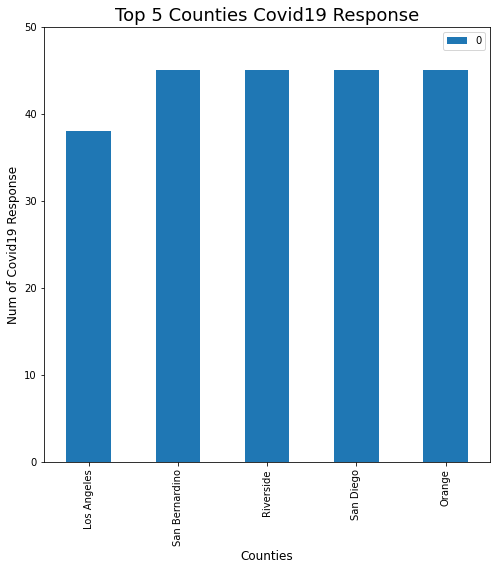

In [66]:
Top5_transposed.plot(kind = "bar",figsize = (8,8))

plt.title('Top 5 Counties Covid19 Response',size = 18)
plt.xlabel('Counties', size = 12)
plt.ylabel('Num of Covid19 Response',size = 12)


plt.ylim(0,50)
plt.show()


In [31]:
num_sierra_response = len(sierra_covid19_response)

In [32]:
num_alpine_response = len(alpine_covid19_response)

In [33]:
num_trinity_response = len(trinity_covid19_response)

In [34]:
num_modoc_response = len(modoc_covid19_response) 

In [35]:
num_mariposa_response = len(mariposa_covid19_response)

In [36]:
Bottom5_counties_covid19_response = pd.DataFrame({
    "Sierra":[num_sierra_response],
    "Alpine": [num_alpine_response], 
    "Trinity": [num_trinity_response],
    "Modoc": [num_modoc_response],
    "Mariposa": [num_mariposa_response]
})

Bottom5_counties_covid19_response.index.name = "number of Covid-19 Response"
Bottom5_counties_covid19_response

,Sierra,Alpine,Trinity,Modoc,Mariposa
number of Covid-19 Response,,,,,
0,53,45,52,53,53


In [37]:
bottom5_counties_covid19 ={
   "Sierra":[num_sierra_response],
    "Alpine": [num_alpine_response], 
    "Trinity": [num_trinity_response],
    "Modoc": [num_modoc_response],
    "Mariposa": [num_mariposa_response]
}

bottom5 = pd.DataFrame(data= bottom5_counties_covid19)

bottom5_transposed = bottom5.T
bottom5.rename_axis(index = None, columns = None)
bottom5.columns.names = ['Counties']
print(bottom5_transposed)

           0
Counties    
Sierra    53
Alpine    45
Trinity   52
Modoc     53
Mariposa  53


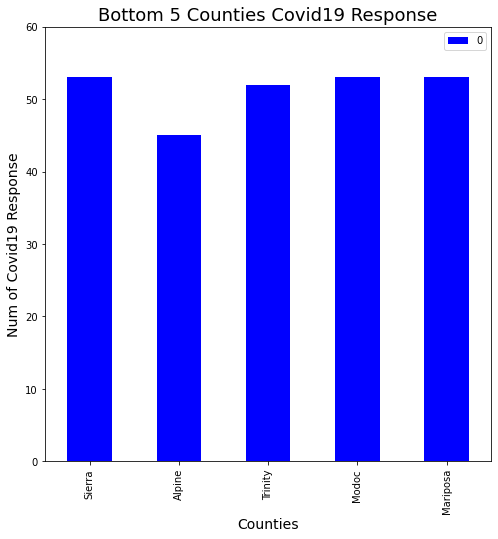

In [38]:
bottom5_transposed.plot(kind = "bar" ,color='b' ,figsize = (8,8))

plt.title('Bottom 5 Counties Covid19 Response',size = 18)
plt.xlabel('Counties', size = 14)
plt.ylabel('Num of Covid19 Response',size = 14)

plt.ylim(0,60)
plt.show()

In [39]:
# the percentage of citation per county 
la_response = num_la_response / total_num_citations * 100

In [40]:
san_bernardino_response = num_san_bernardino_response / total_num_citations * 100

In [41]:
riverside_response = num_riverside_response / total_num_citations * 100

In [42]:
san_diego_response = num_san_diego_response / total_num_citations * 100

In [43]:
oc_response = num_oc_response / total_num_citations * 100

In [44]:
sierra_response = num_sierra_response / total_num_citations * 100

In [45]:
alpine_response = num_alpine_response / total_num_citations * 100

In [46]:
trinity_response = num_trinity_response / total_num_citations * 100

In [47]:
modoc_response = num_modoc_response / total_num_citations * 100

In [48]:
mariposa_response = num_mariposa_response / total_num_citations * 100

In [49]:
percent_covid19_response = pd.DataFrame({
    "Los Angeles": [la_response],
    "San Bernardino": [san_bernardino_response], 
    "Riverside": [riverside_response],
    "San Diego": [san_diego_response],
    "Orange": [oc_response],
    "Sierra":[sierra_response],
    "Alpine": [alpine_response], 
    "Trinity": [trinity_response],
    "Modoc": [modoc_response],
    "Mariposa": [mariposa_response]
    
})

percent_covid19_response["Los Angeles"]= percent_covid19_response["Los Angeles"].map("{0:,.2f}".format)
percent_covid19_response["San Bernardino"]= percent_covid19_response["San Bernardino"].map("{0:,.2f}".format)
percent_covid19_response["Riverside"]= percent_covid19_response["Riverside"].map("{0:,.2f}".format)
percent_covid19_response["San Diego"]= percent_covid19_response["San Diego"].map("{0:,.2f}".format)
percent_covid19_response["Orange"]= percent_covid19_response["Orange"].map("{0:,.2f}".format)
percent_covid19_response["Sierra"]= percent_covid19_response["Sierra"].map("{0:,.2f}".format)
percent_covid19_response["Alpine"]= percent_covid19_response["Alpine"].map("{0:,.2f}".format)
percent_covid19_response["Trinity"]= percent_covid19_response["Trinity"].map("{0:,.2f}".format)
percent_covid19_response["Modoc"]= percent_covid19_response["Modoc"].map("{0:,.2f}".format)
percent_covid19_response["Mariposa"]= percent_covid19_response["Mariposa"].map("{0:,.2f}".format)



percent_covid19_response

,Los Angeles,San Bernardino,Riverside,San Diego,Orange,Sierra,Alpine,Trinity,Modoc,Mariposa
0,13.01,15.41,15.41,15.41,15.41,18.15,15.41,17.81,18.15,18.15


In [50]:
# top five counties 
la_action = la_list.loc[la_list["County_Name"] == "Los Angeles County"]['Action'].value_counts()

In [51]:
san_bernardino_action = san_bernardino_list.loc[san_bernardino_list["County_Name"] == "San Bernardino County"]['Action'].value_counts()

In [52]:
riverside_action =riverside_list.loc[riverside_list["County_Name"] == "Riverside County"]['Action'].value_counts()

In [53]:
san_diego_action = san_diego_list.loc[san_diego_list["County_Name"] == "San Diego County"]['Action'].value_counts()

In [54]:
oc_action = oc_list.loc[oc_list["County_Name"] == "Orange County"]['Action'].value_counts()

In [55]:
top5_counties = pd.DataFrame({
    "Los Angeles":la_action,
    "San Bernardino": san_bernardino_action, 
    "Riverside": riverside_action,
    "San Diego": san_diego_action,
    "Orange": oc_action
    
})
top5_counties

,Los Angeles,San Bernardino,Riverside,San Diego,Orange
Open with social distancing/reduced seating/enhanced sanitation,191,198,198,198,198
Curbside/carryout/delivery only,97,90,90,90,90
none,4,4,4,4,4


In [56]:
# buttom five counties

sierra_action  =sierra_list.loc[sierra_list["County_Name"] == "Sierra County"]['Action'].value_counts()

In [57]:
alpine_action  = alpine_list.loc[alpine_list["County_Name"] == "Alpine County"]['Action'].value_counts()

In [58]:
trinity_action = trinity_list.loc[trinity_list["County_Name"] == "Trinity County"]['Action'].value_counts()

In [59]:
modoc_action = modoc_list.loc[modoc_list["County_Name"] == "Modoc County"]['Action'].value_counts()

In [60]:
mariposa_action = mariposa_list.loc[mariposa_list["County_Name"] == "Mariposa County"]['Action'].value_counts()

In [61]:
bottom5_counties = pd.DataFrame({
    "Sierra":sierra_action,
    "Alpine": alpine_action, 
    "Trinity": trinity_action,
    "Modoc": modoc_action,
    "Mariposa": mariposa_action
    
})

In [62]:
bottom5_counties

,Sierra,Alpine,Trinity,Modoc,Mariposa
Open with social distancing/reduced seating/enhanced sanitation,211,203,231,232,206
Curbside/carryout/delivery only,77,85,57,56,82
none,4,4,4,4,4
